# CASE STUDY : RANDOM FOREST

 **Problem Statement** :
 A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Random Forest
-----
- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML.
- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
- Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

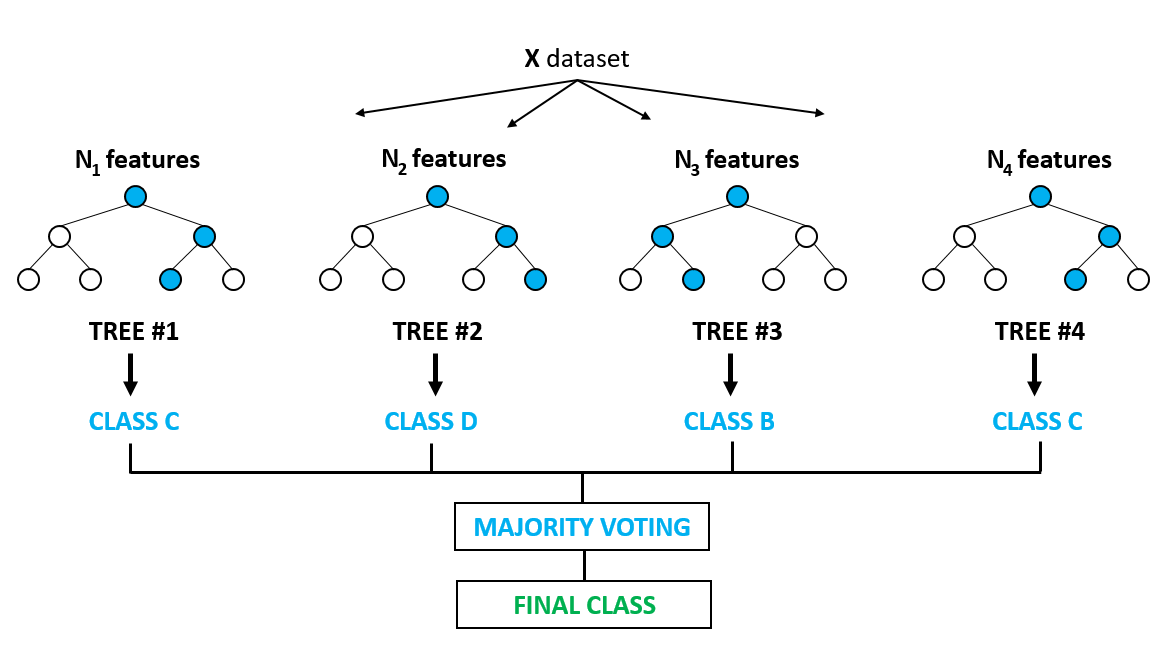

procedure

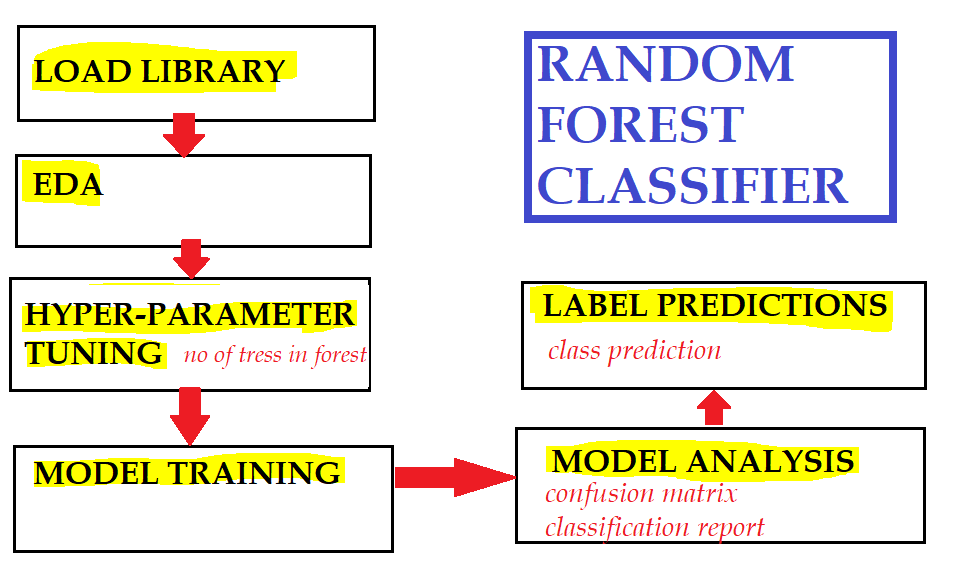

In [77]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler, LabelEncoder

#SET 3 : ML SPECIFIC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#SET 4 : ML EVALUATION SPECIFIC
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV


In [3]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving Company_Data.csv to Company_Data.csv


In [6]:
# Import Dataset
df = pd.read_csv('Company_Data.csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

DATA DICTIONARY
-----
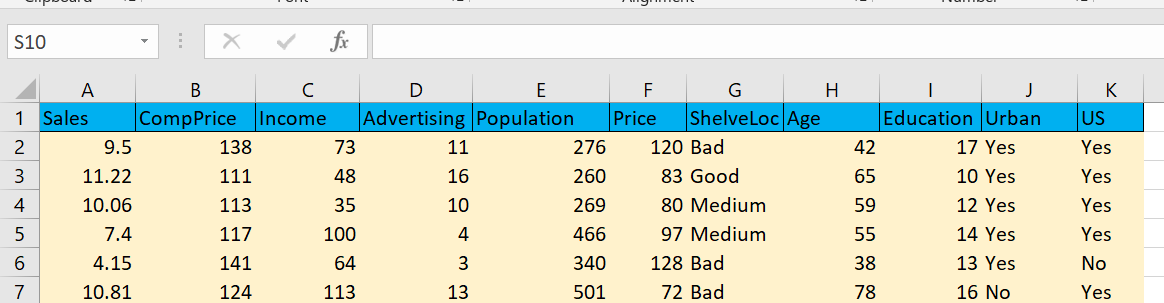

About the data:

consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
+ Sales -- Unit sales (in thousands) at each location
+ Competitor Price -- Price charged by competitor at each location
+ Income -- Community income level (in thousands of dollars)
+ Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+ Population -- Population size in region (in thousands)
+ Price -- Price company charges for car seats at each site
+ Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+ Age -- Average age of the local population
+ Education -- Education level at each location
+ Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+ US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# EDA

- data dictionary
- data cleaning
- variable analysis
- univariate analysis
- multivariate analysis
- correlation analysis
- statistical analysis
- required tranformations

DataSet analysis
----

- data size
- data type
- data shape

In [78]:
df.shape

(400, 11)

conclusion

- no of observations = 400
- no of features = 11

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


All the columns data types are correctly identified as  per dictionary provided

DATA CLEANING
----

- missing/null values
- duplicates


Missing Values

In [80]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [81]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

no missing data so all the entries are valid for use.


Duplicate Analysis

In [82]:
df[df.duplicated()].shape

(0, 11)

In [83]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

conclusion : 0 duplicate observation

STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [84]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

conclusion : scaling is required

In [85]:
#lets examine sales feature
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

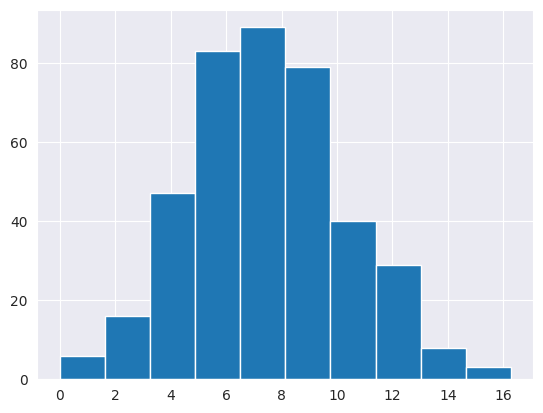

In [86]:
plt.hist('Sales',data=df)
plt.show()

conlsuion : As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales


In [87]:
df.Sales.max()

16.27

In [88]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [89]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [91]:
#categorical_features

categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [92]:
#numerical_features
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

 Univariate Analysis
 -----

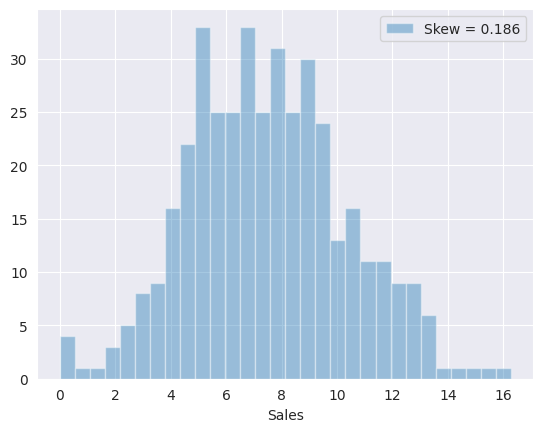

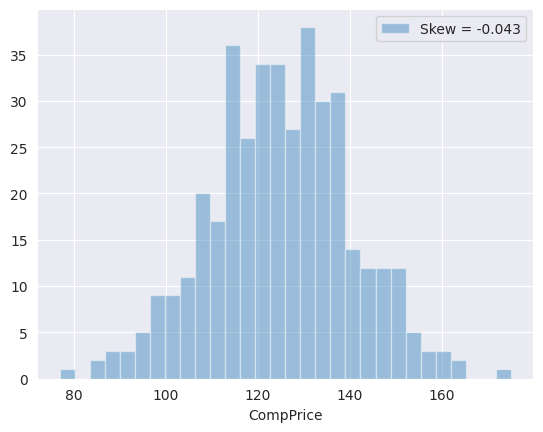

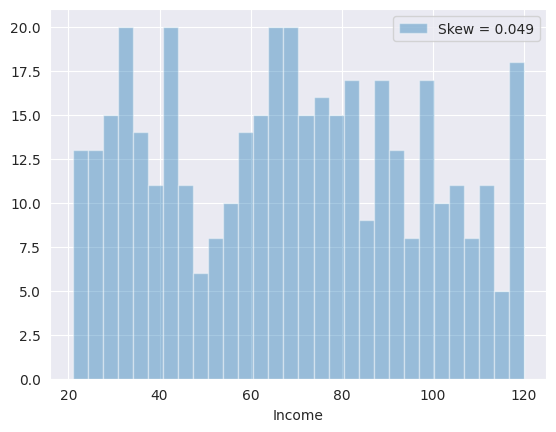

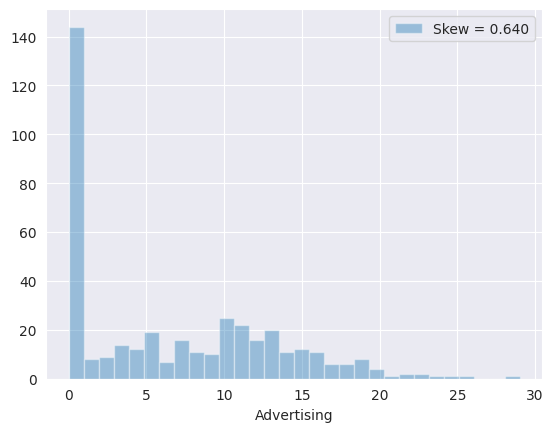

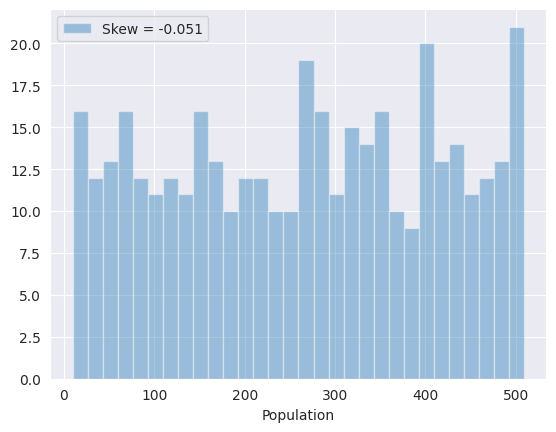

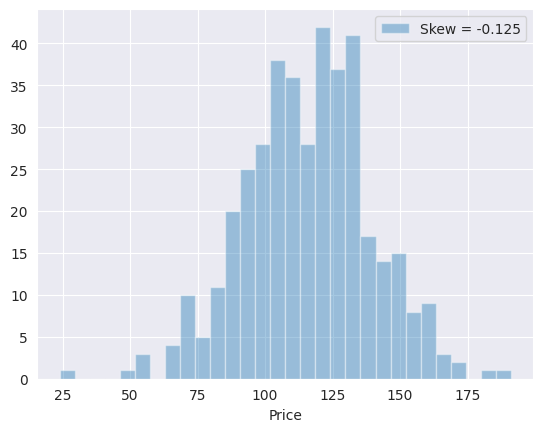

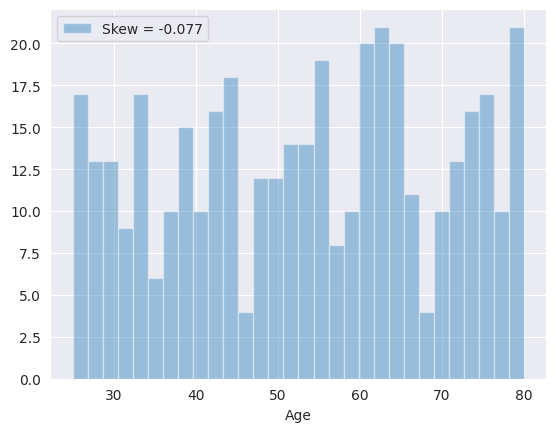

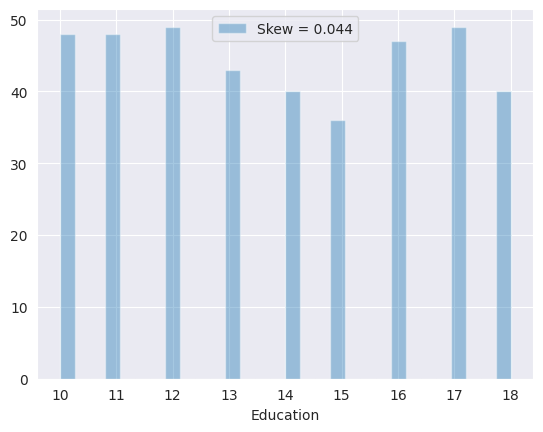

In [93]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Outlier Analysis
----

In [94]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 0 observations with more than 2 outliers


 conclusion :there exists no observations with multiple outliers.



In [95]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

<Axes: >

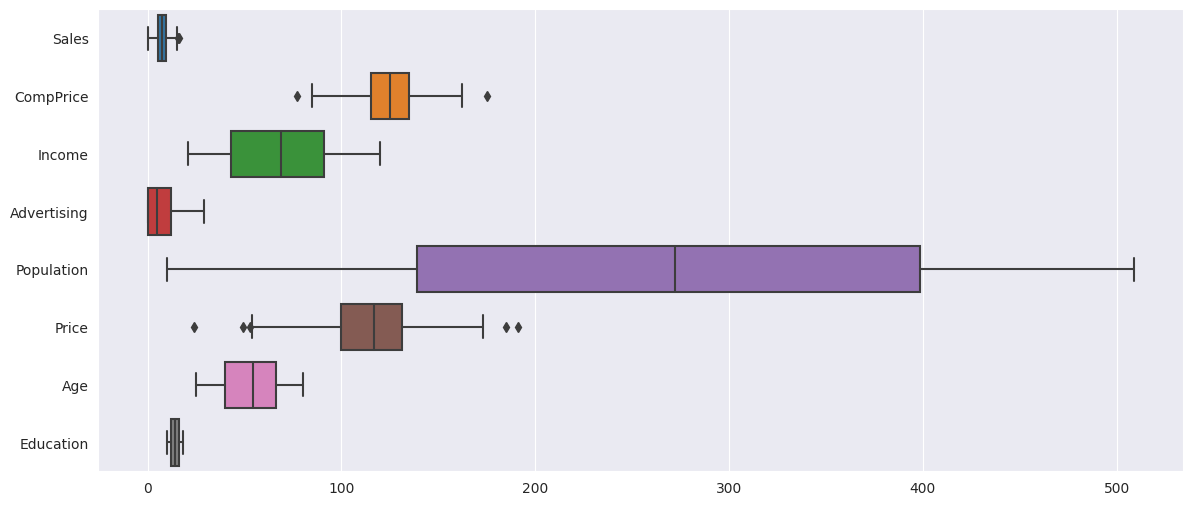

In [96]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

conlusion : no oulier but requirement of scling

CORRELATION ANALYSIS
---

<Figure size 800x800 with 0 Axes>

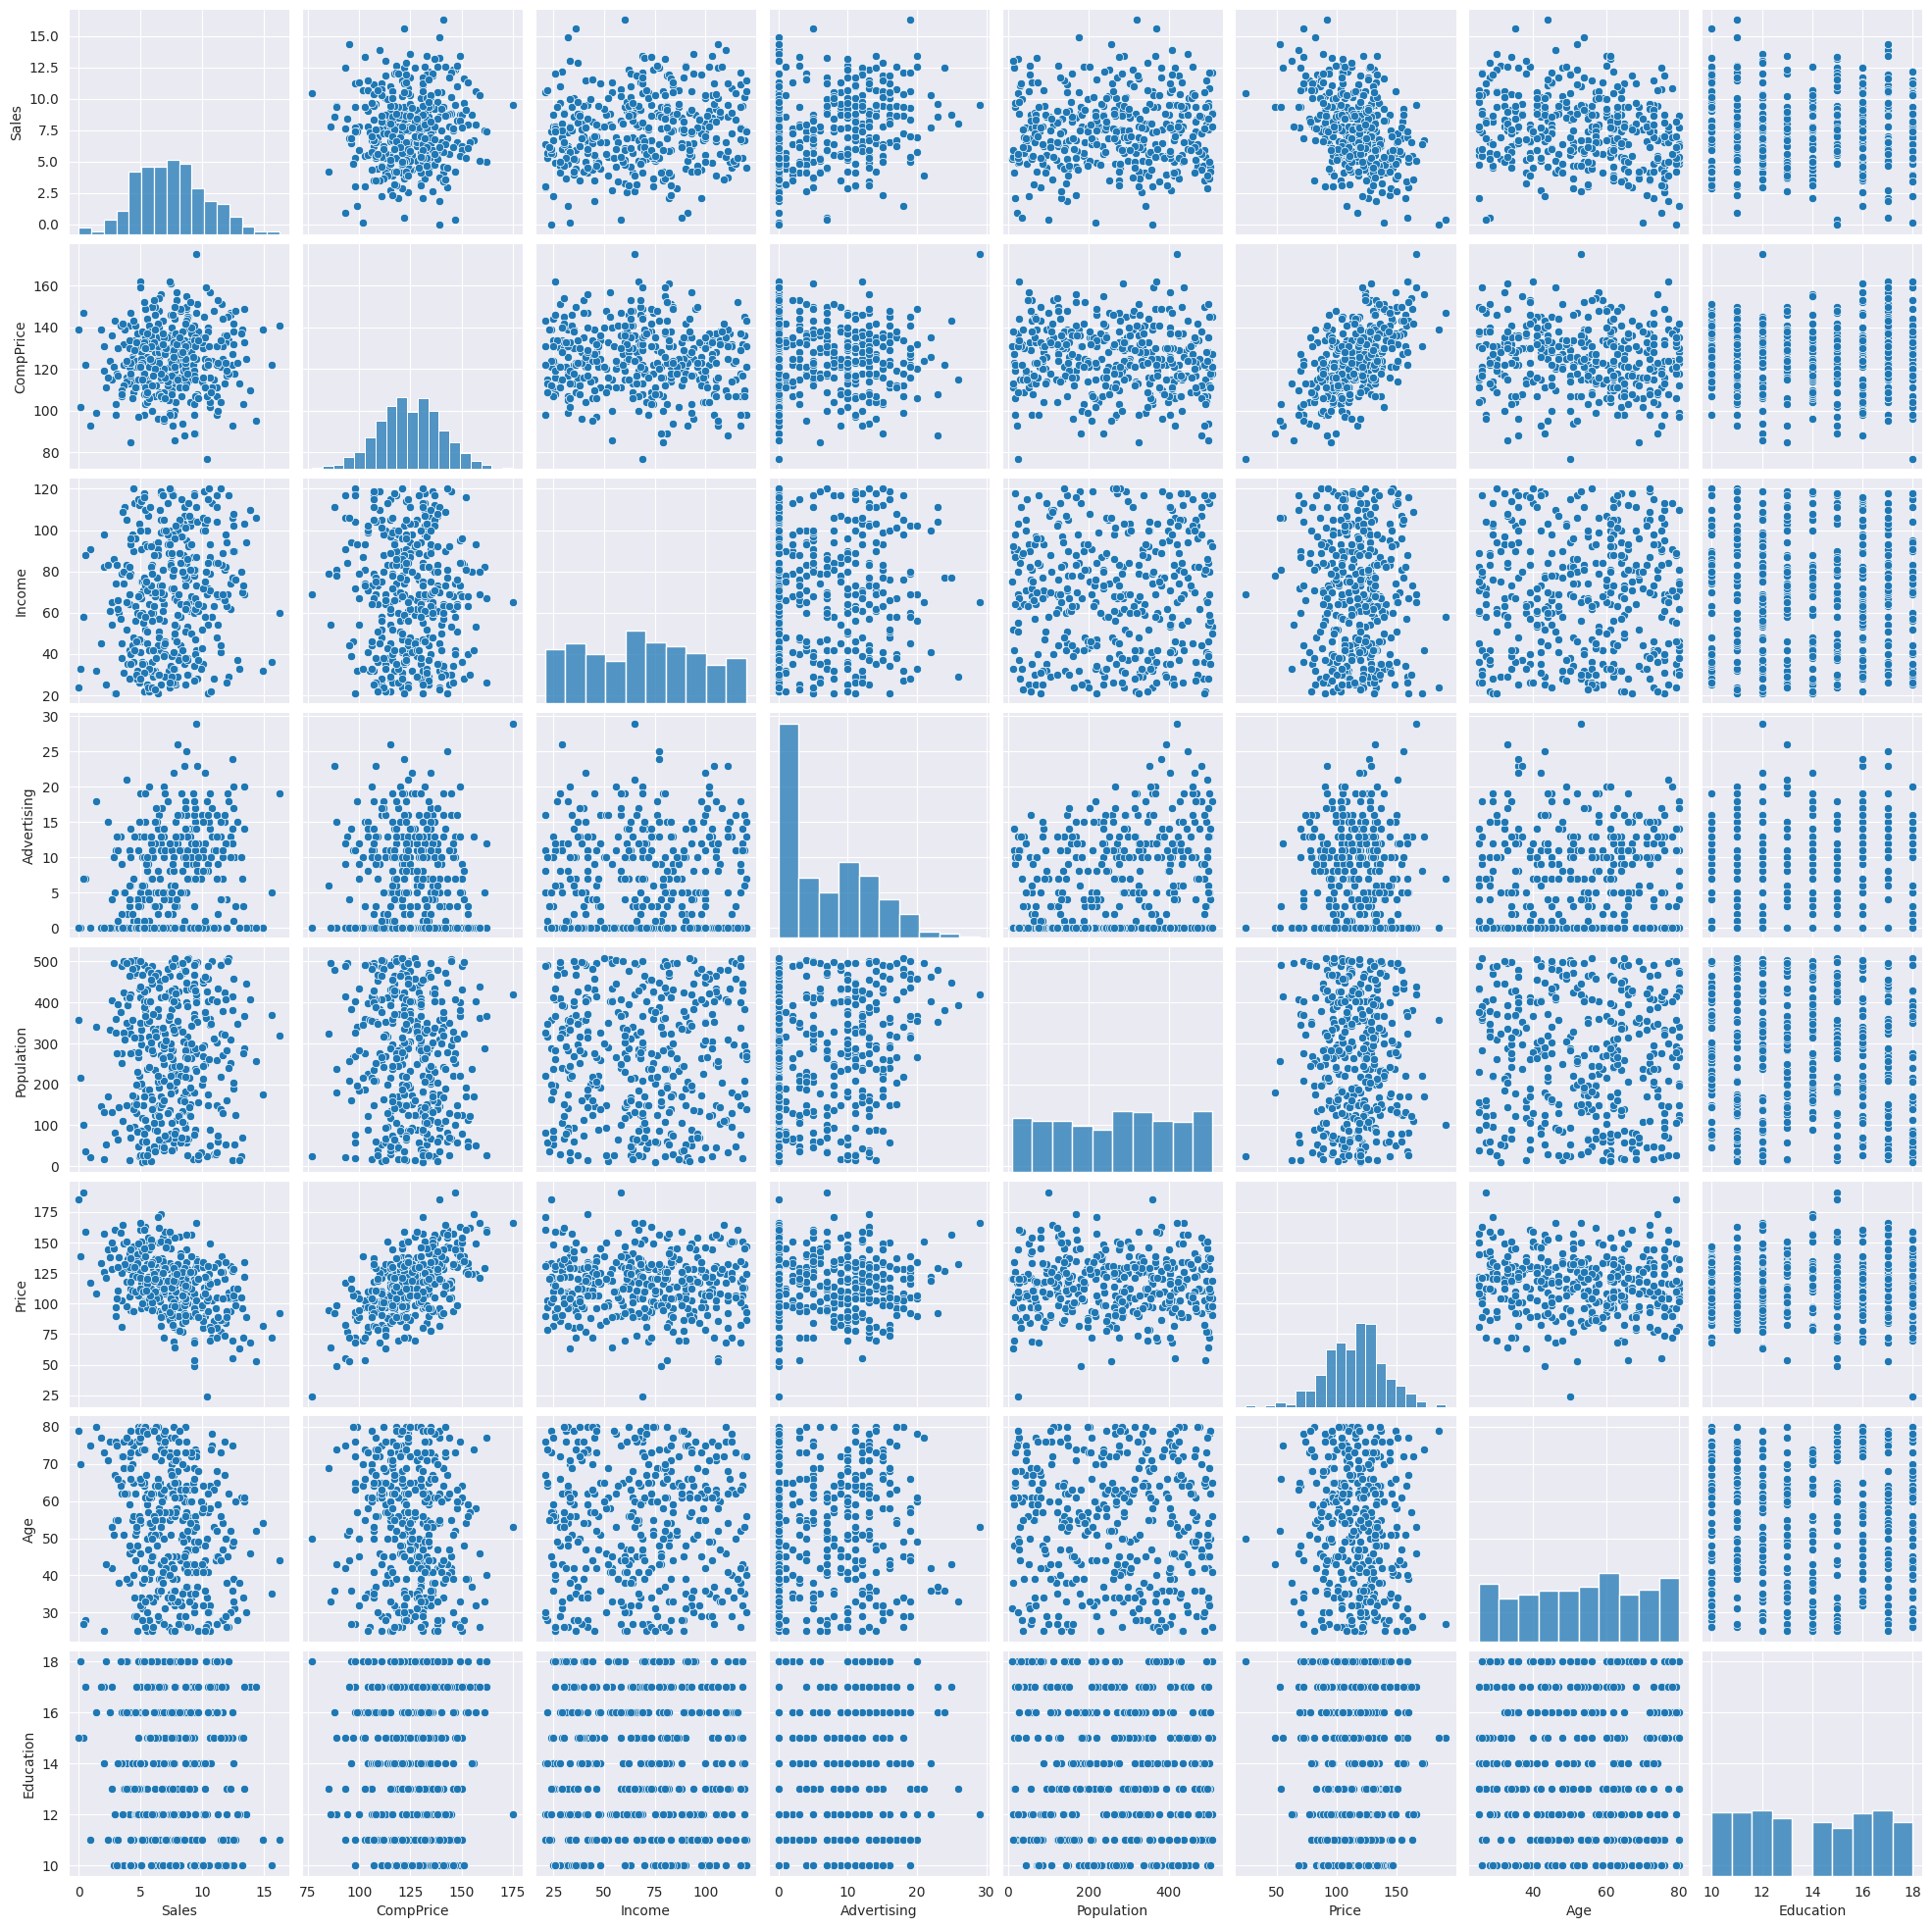

In [97]:
#pairplot
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<Axes: >

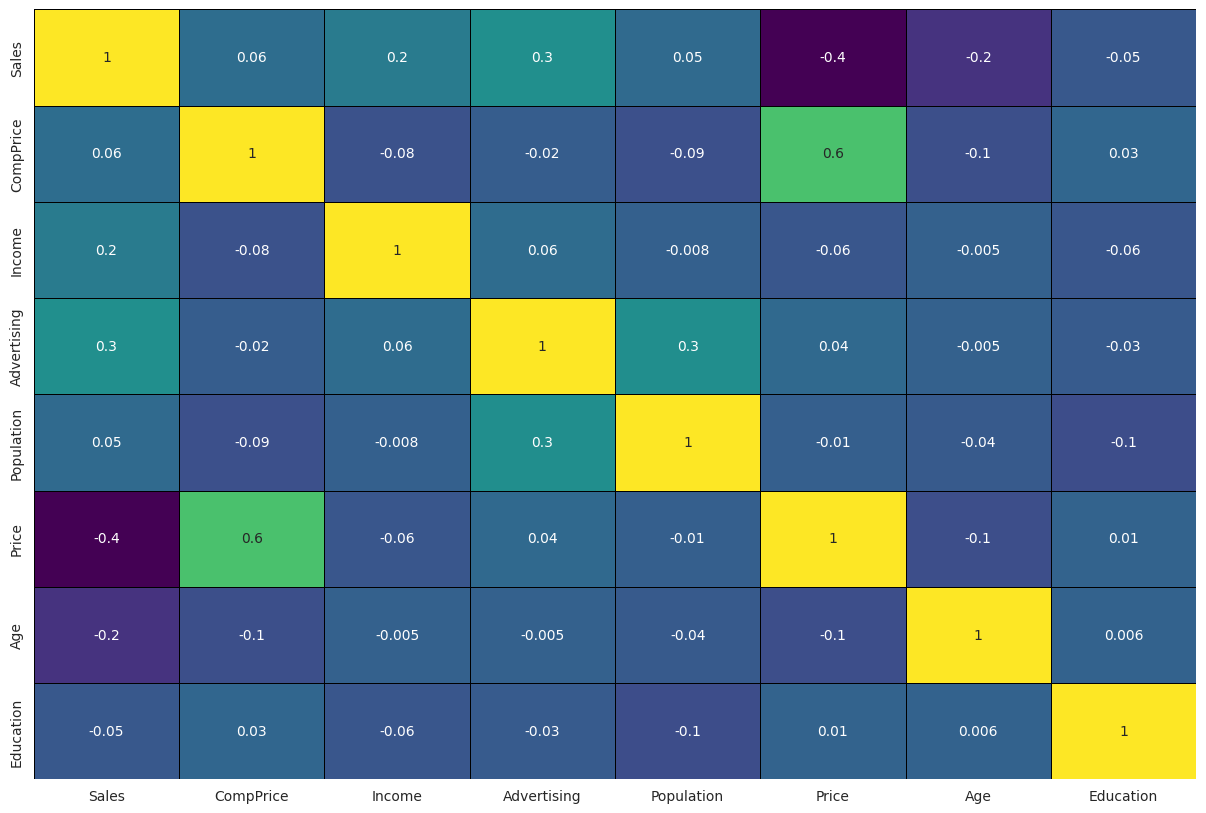

In [98]:
#correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

categorical_features
-----


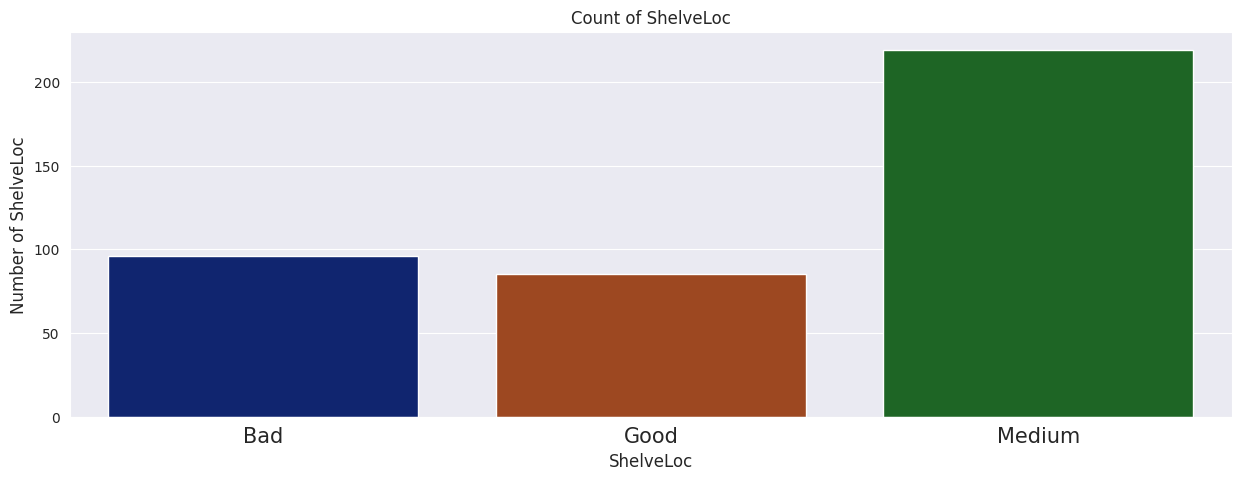

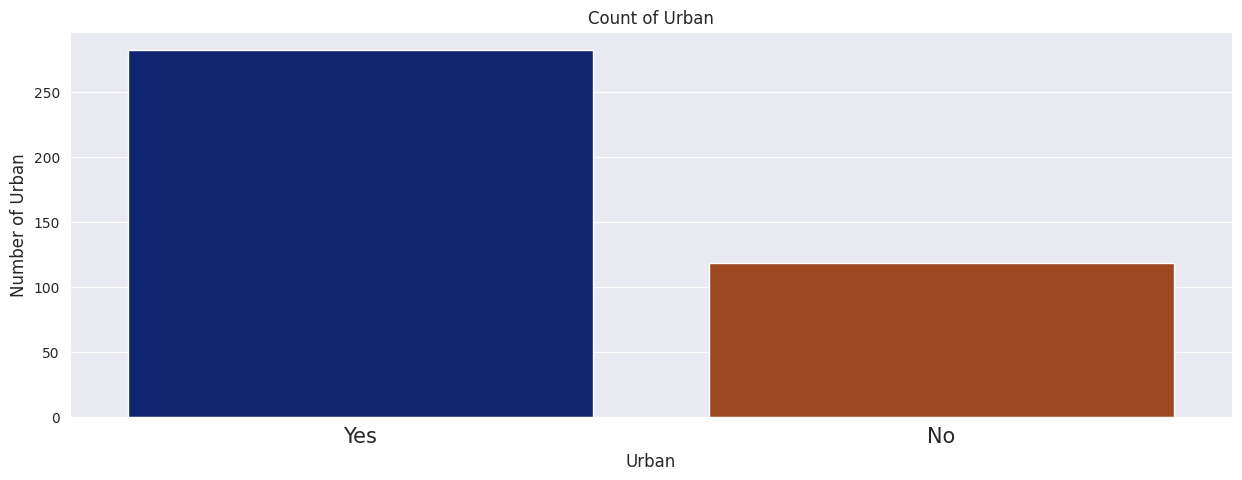

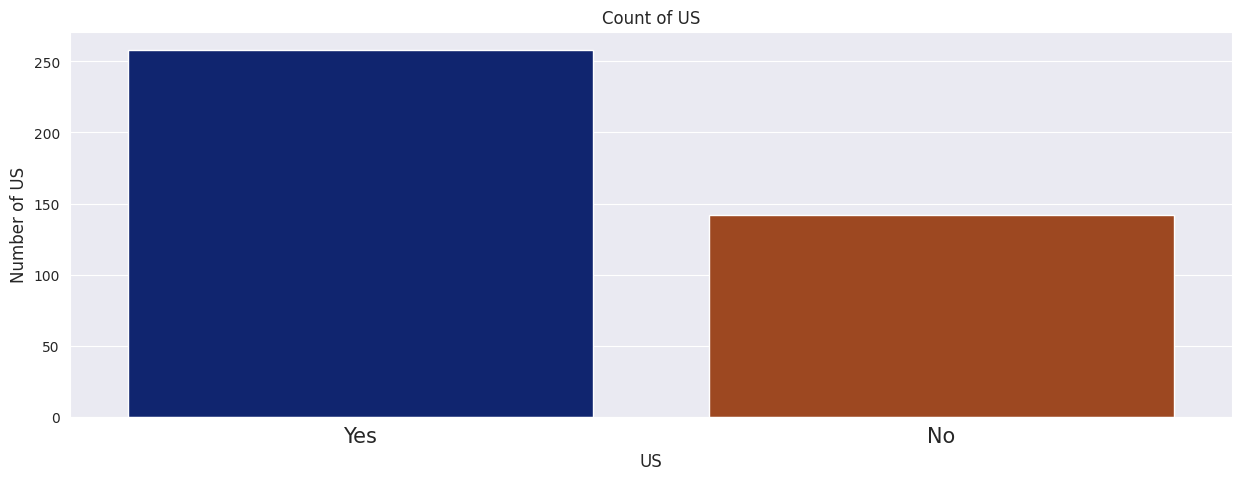

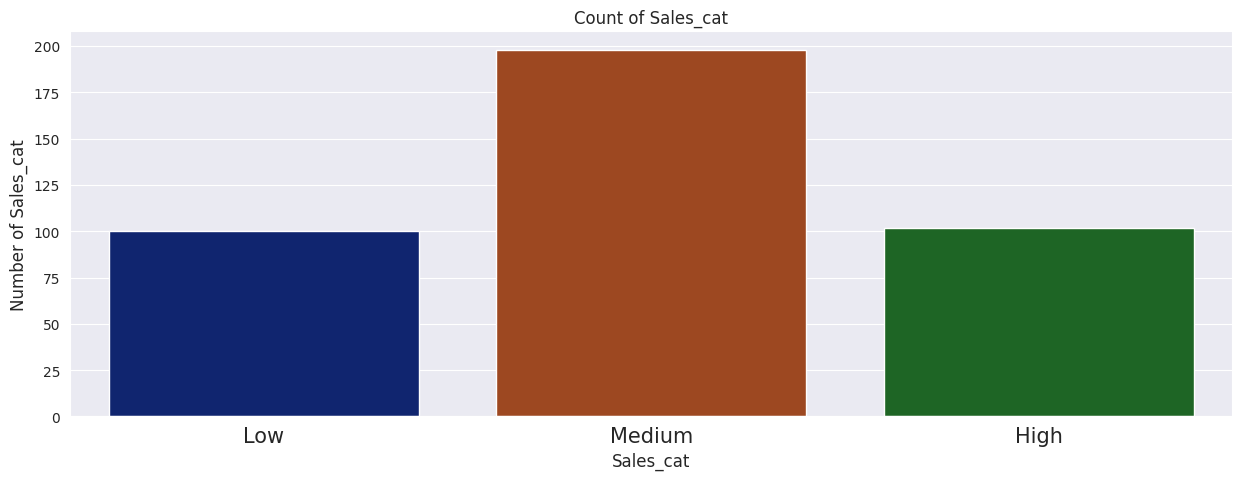

In [99]:
#categorical_feature
for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df1[column].value_counts(ascending=True);

    #plot
    plt.title("Count of "+ column)
    sns.countplot(data=df1, x=column,palette = "dark")
    #label
    plt.xticks(rotation = 0, size = 15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

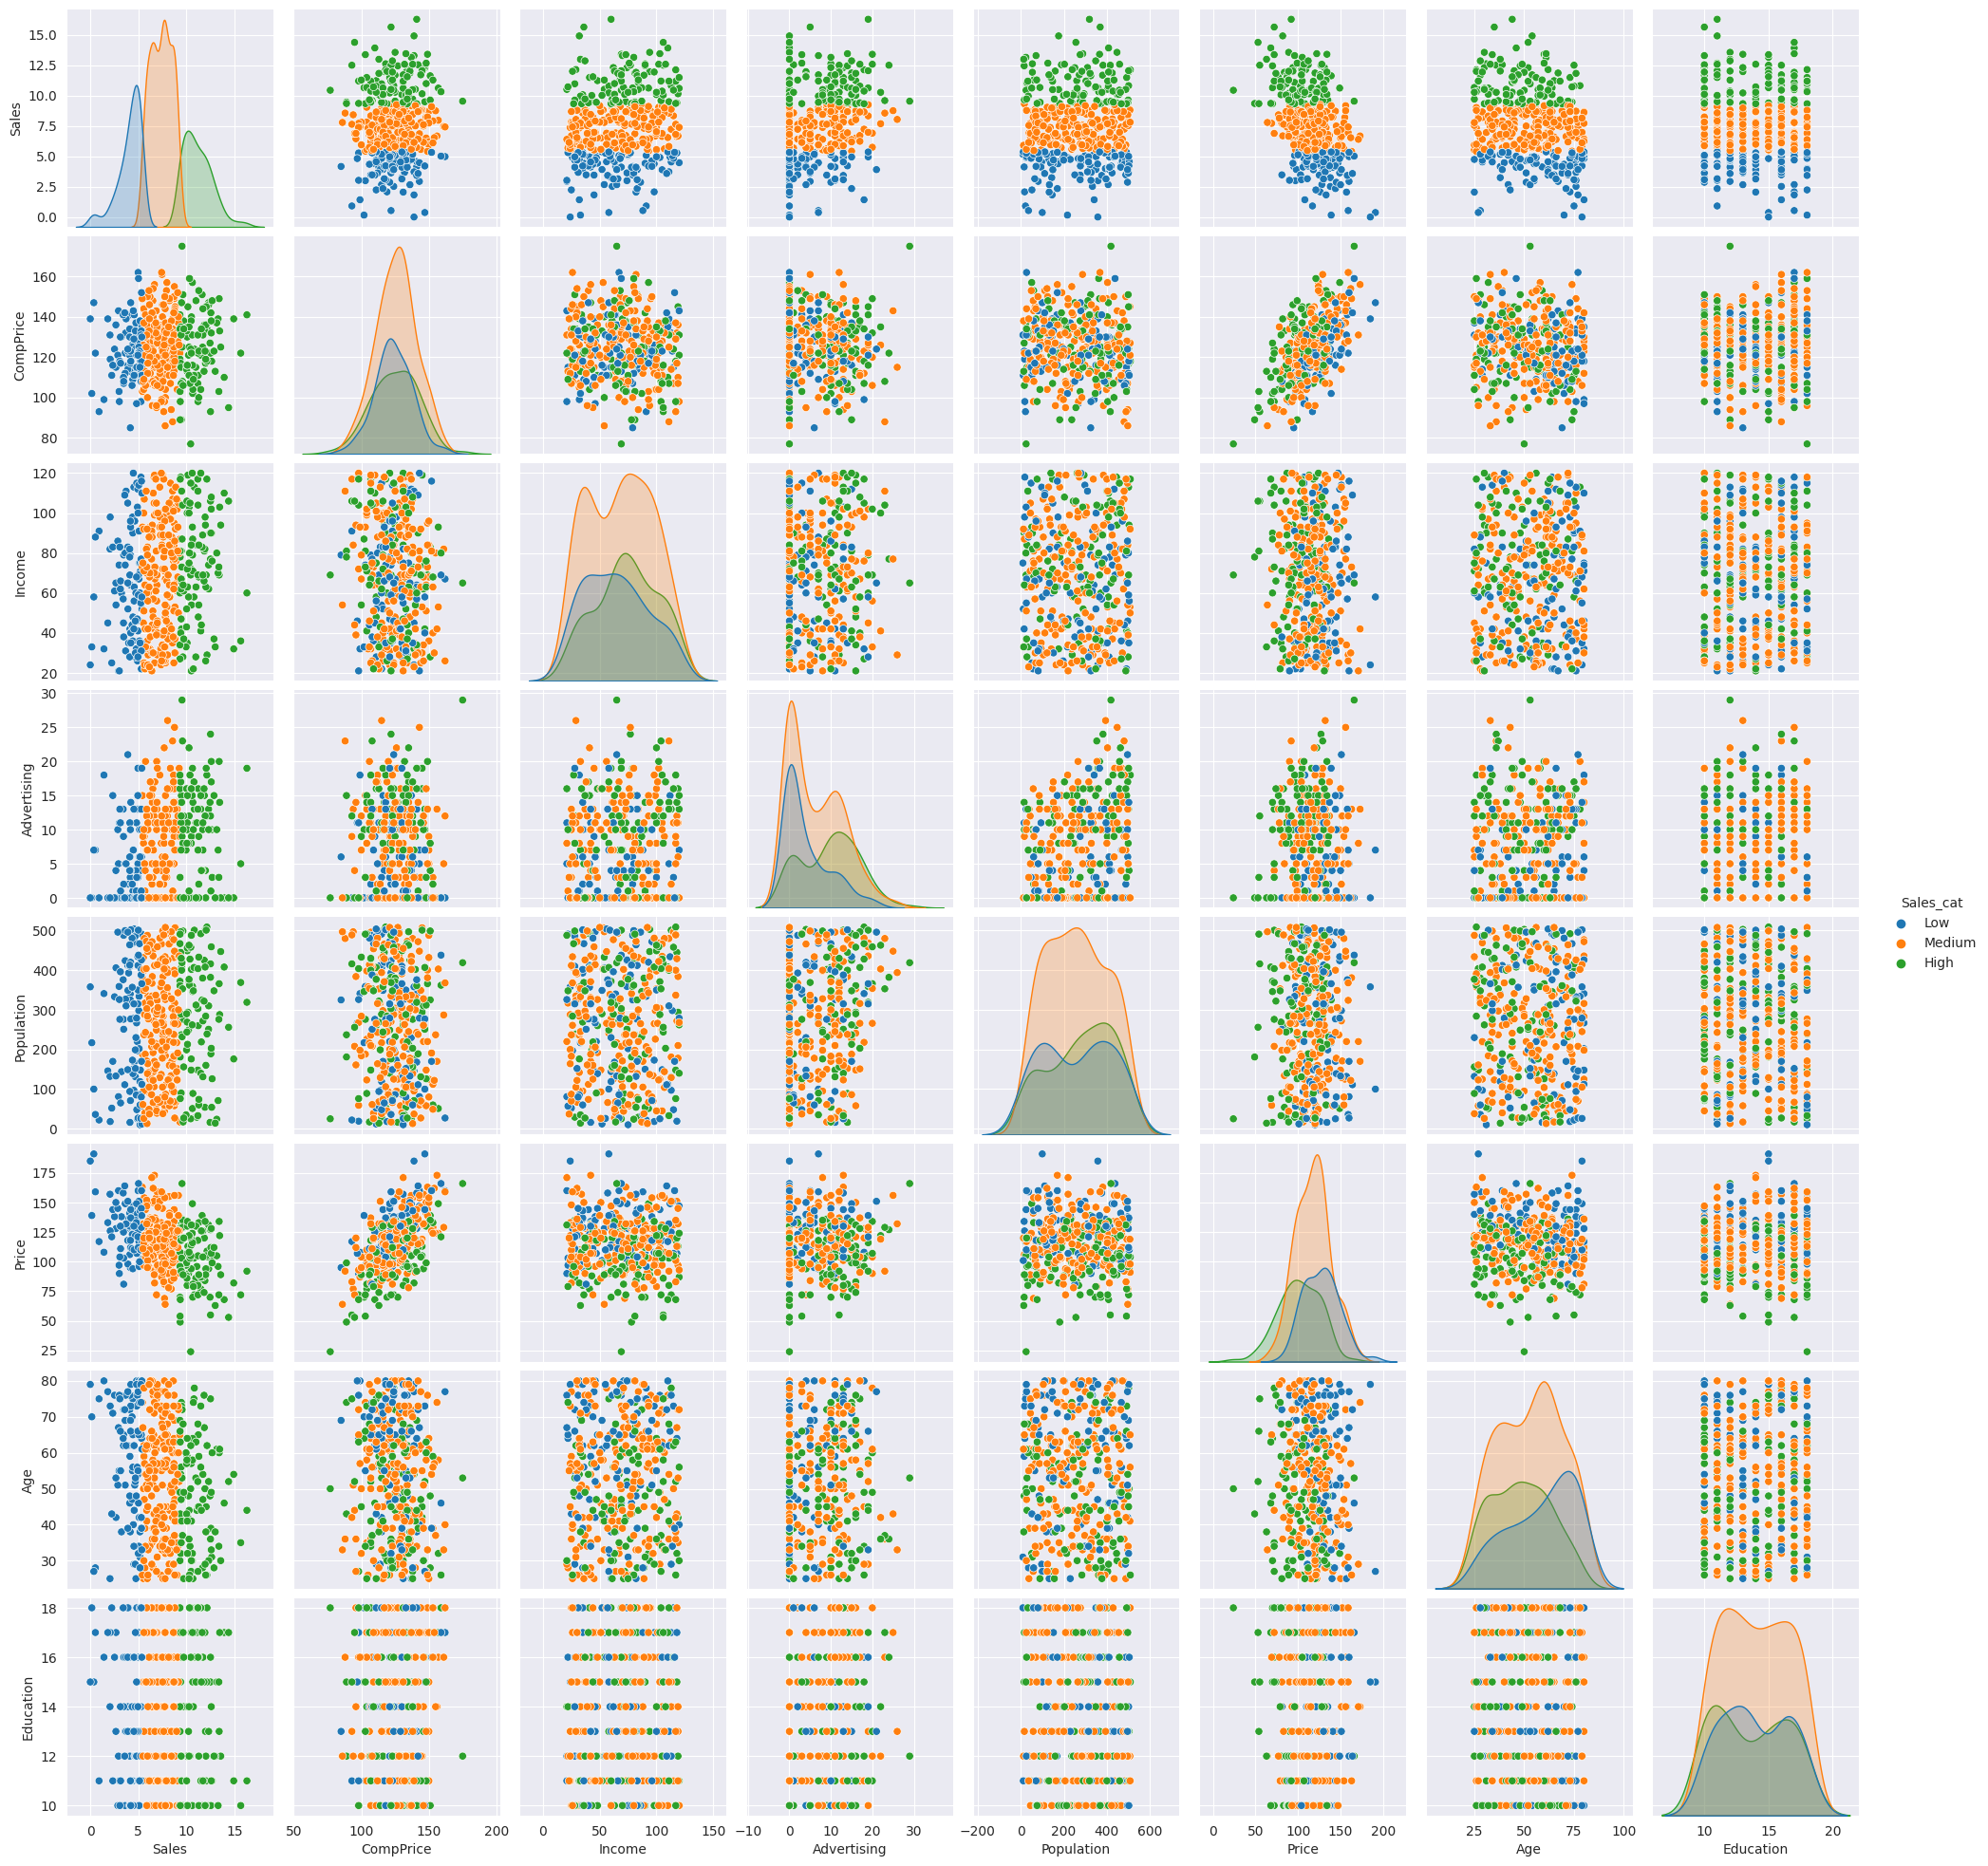

In [100]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df1, hue = 'Sales_cat')

In [101]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

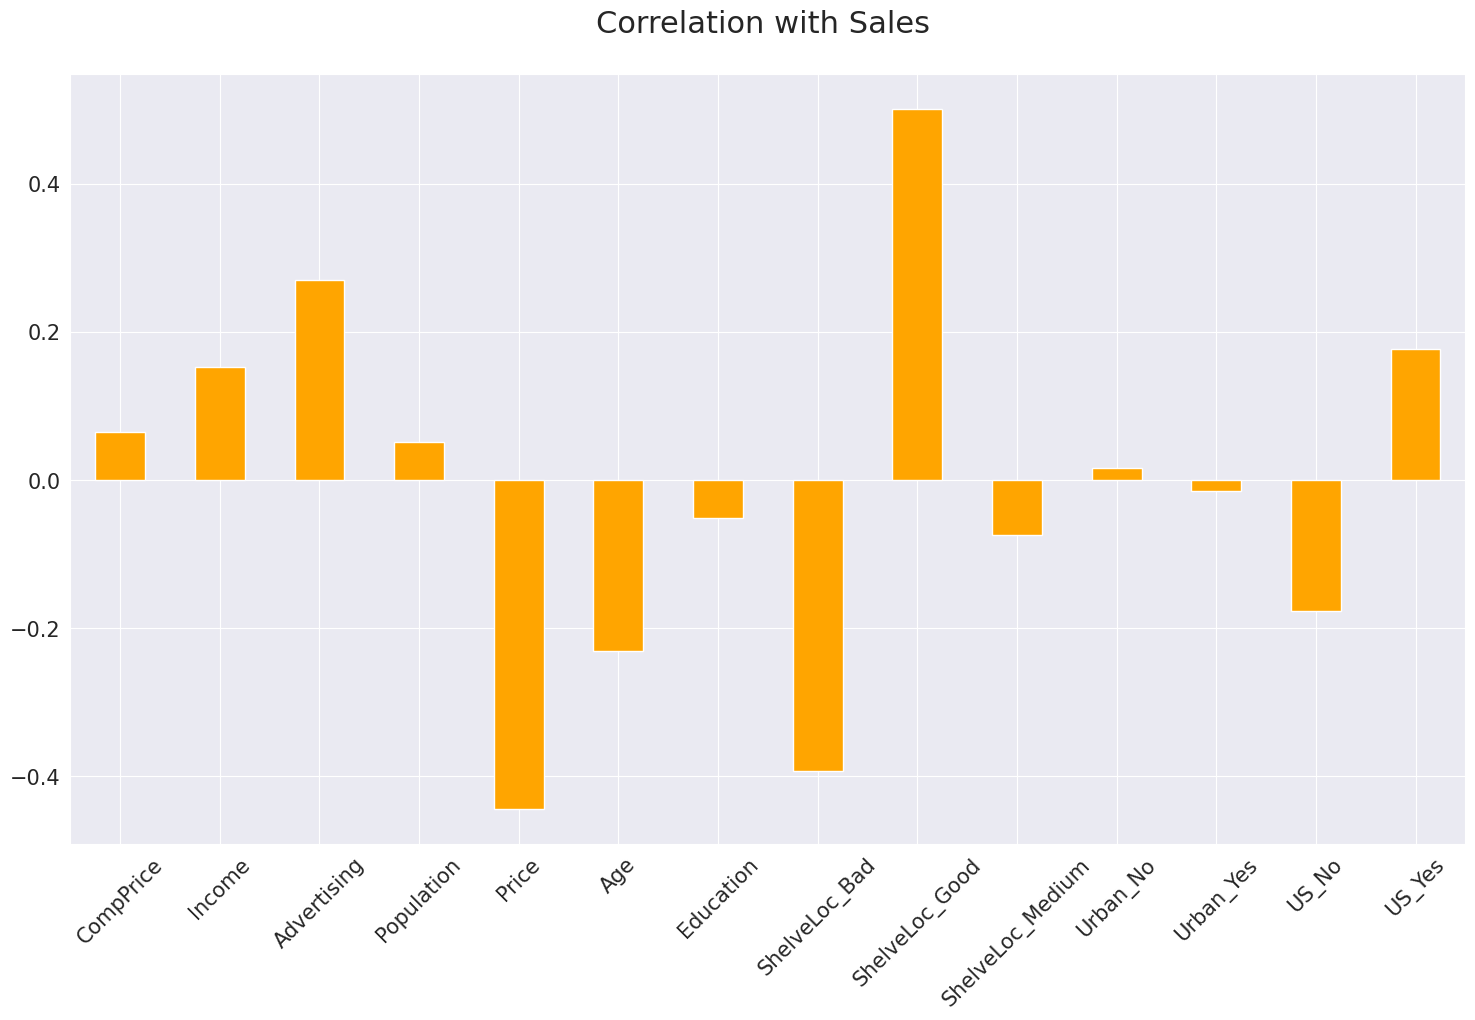

In [102]:
data2 = data_.copy()

correlations = data2.corrwith(df1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

 Checking for Imbalanced or balanced dataset with regards to the Sales

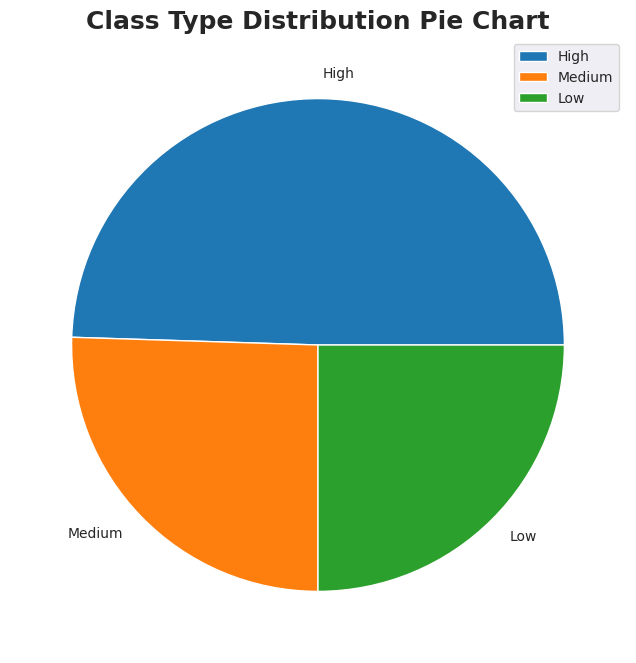

In [103]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),labels=df1.Sales_cat.unique())
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [104]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

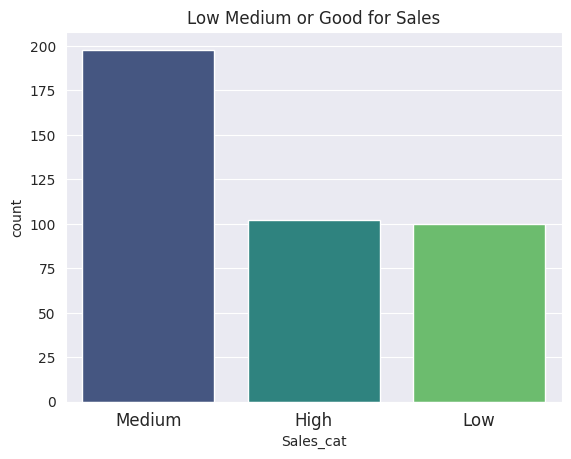

In [105]:
sns.countplot(x='Sales_cat', data=df1, palette = 'viridis',
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

# Data Pre-Processing

In [106]:
df1.head(1)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    9.5        138      73           11         276    120       Bad   42   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High

In [107]:
df2=df1.copy()

In [108]:
#dummy label for Shelveloc
df2['ShelveLoc']=df2['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [109]:
df2.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [110]:
# label encoding Urban , US , Sales

df2['Urban']=df2['Urban'].map({'Yes':1,'No':0})
df2['US']=df2['US'].map({'Yes':1,'No':0})
df2['Sales_cat']=df2['Sales_cat'].map({'High':3 ,'Medium':2 ,'Low':1})

In [111]:
df2.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban  US Sales_cat  
0         17      1   1         3  
1         10      1   1         3  
2         12      1   1         3  
3         14      1   1         2  
4         13      1   0         1

In [112]:
df2.drop('Sales',axis=1, inplace =True)
df2.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          3   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          3   38   

   Education  Urban  US Sales_cat  
0         17      1   1         3  
1         10      1   1         3  
2         12      1   1         3  
3         14      1   1         2  
4         13      1   0         1

In [113]:
x=df2.iloc[:,:-3]
y=df2.iloc[:,-1]

In [114]:
x.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          3   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          3   38   

   Education  
0         17  
1         10  
2         12  
3         14  
4         13

In [115]:
scaler=StandardScaler()
std_x=scaler.fit_transform(x)

In [116]:
y.head()

0    3
1    3
2    3
3    2
4    1
Name: Sales_cat, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [117]:
#all predictor features
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education'],
      dtype='object')

In [118]:
# response feature
y.unique()

[3, 2, 1]
Categories (3, int64): [1 < 2 < 3]

In [119]:
y.value_counts()

2    198
3    102
1    100
Name: Sales_cat, dtype: int64

Spliting Data in Test Train set


In [120]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(std_x,y, test_size=0.2,random_state=40)

In [121]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (320, 8)
Shape of X_test:  (80, 8)
Shape of y_train:  (320,)
Shape of y_test (80,)


# Random Forest hyperparameter tuning

In [122]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [123]:
loc = np.array(score_array).max()
score_array.index(loc)+1

153

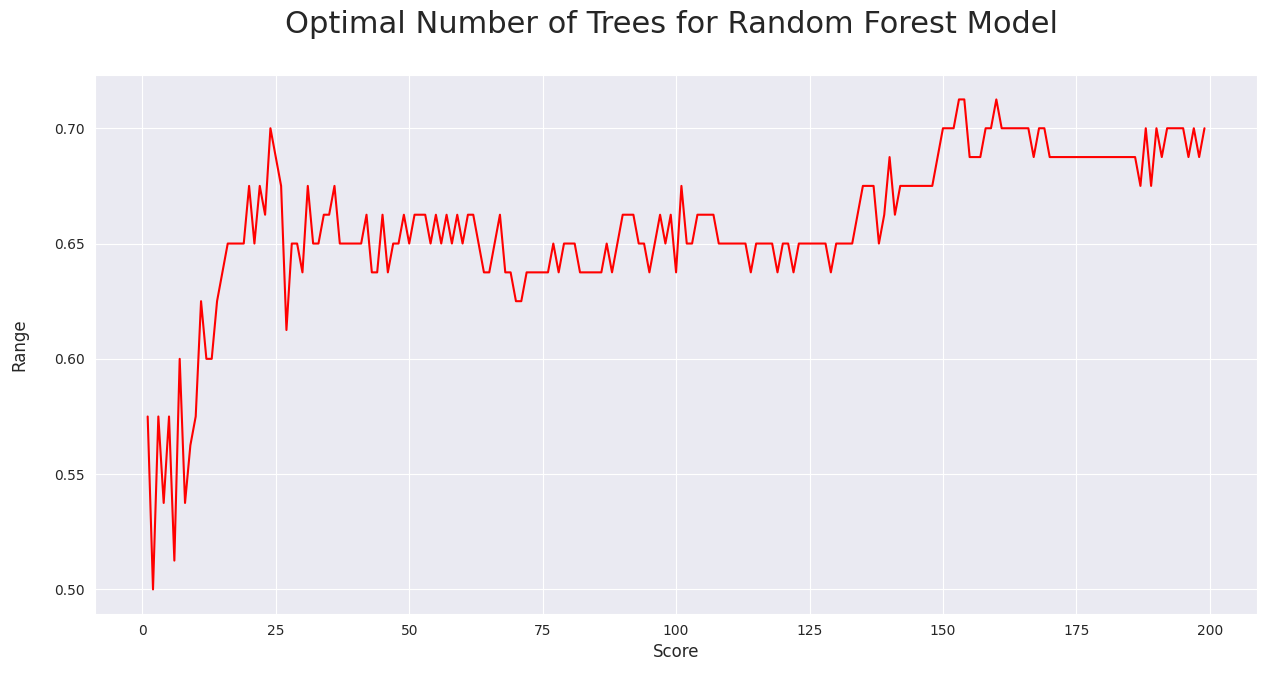

In [124]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = 'red')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#BUILDING RANDOM FOREST MODEL with number of trees=153

In [125]:
rf_clf = RandomForestClassifier(n_estimators=153)
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=153)

# model evaluation

In [126]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

PRINTING RESULTS

In [127]:
#RESULTS
print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1      2     3  accuracy  macro avg  weighted avg
precision   1.0    1.0   1.0       1.0        1.0           1.0
recall      1.0    1.0   1.0       1.0        1.0           1.0
f1-score    1.0    1.0   1.0       1.0        1.0           1.0
support    77.0  160.0  83.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[ 77   0   0]
 [  0 160   0]
 [  0   0  83]]

Test Result:
Accuracy Score: 66.25%
_______________________________________________
CLASSIFICATION REPORT:
                   1          2          3  accuracy  macro avg  weighted avg
precision   0.750000   0.607843   0.764706    0.6625   0.707516      0.685968
recall      0.391304   0.815789   0.684211    0.6625   0.630435      0.662500
f1-score    0.514286   0.696629   0.722222    0.6625   0.644379      0.650284
support    23.000000  38.000000  19.0